# Dataset

En primer lugar generamos el dataset en el que nos basaremos.
Tendremos dos clases distintas que les daremos el valor 1 y -1 respectivamente y seguirán una distribución normal. Puedes cambiar este dataset por cualquier que te guste pero las clases siempre deberán estar representadas con los valores 1 y -1.

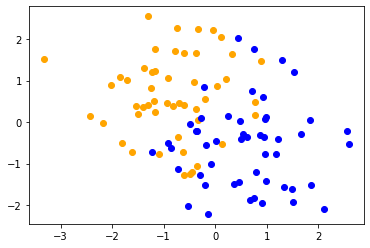

In [1]:
import pennylane as qml
from pennylane import numpy as np 
import matplotlib.pyplot as plt

np.random.seed(42)

n_samples = 200

# A es la clase 1
# B es la clase -1

A_train = np.array([[np.random.normal(loc=-0.7), np.random.normal(loc=0.7)] for i in range(n_samples//4)]) 
B_train = np.array([[np.random.normal(loc=0.7), np.random.normal(loc=-0.7)] for i in range(n_samples//4)]) 

train_data = np.concatenate([A_train, B_train])
train_labels = [1] * (n_samples // 4) + [-1] * (n_samples // 4)

A_test = np.array([[np.random.normal(loc=-0.7), np.random.normal(loc=0.7)] for i in range(n_samples//4)]) 
B_test = np.array([[np.random.normal(loc=0.7), np.random.normal(loc=-0.7)] for i in range(n_samples//4)]) 

test_data = np.concatenate([A_test, B_test])
test_labels = [1] * (n_samples // 4) + [-1] * (n_samples // 4)

plt.scatter(A_train[:,0], A_train[:,1], color = "orange")
plt.scatter(B_train[:,0], B_train[:,1], color = "blue")

plt.show()

# Modelo
En primer lugar definiremos el feature map, es decir, como vamos a codificar los datos. Se puede ver como la función que envían un vector del dominio clásico al dominio cuántico. Después de esto, hay que definir una función kernel capaz de determinar si dos elementos son similares o no.

In [2]:
def feature_map(x, wires):
    qml.RY(x[0], wires = wires[0])
    qml.RY(x[1], wires = wires[1])
    
# |<x1|x2>|^2

dev = qml.device("default.qubit", wires = 5)

@qml.qnode(dev)
def kernel(x1,x2):
    
    feature_map(x1, wires = [1,2])
    feature_map(x2, wires = [3,4])
    
    qml.Hadamard(wires = 0)
    qml.CSWAP(wires = [0,1,3])
    qml.CSWAP(wires = [0,2,4])
    qml.Hadamard(wires = 0)
    
    return qml.expval(qml.PauliZ(0))


    

# Predicción

Una vez que tenemos el modelo generado ya podemos preguntar por las predicciones de nuestro conjunto de test. Es importante remarcar que este modelo es más lento a la hora de predecir que otros algoritmos variacionales pero a cambio no ha hecho falta realizar ningún entrenamiento!

In [3]:
def prediction(x):
    sol = 0
    for i in range(len(train_data)):
        sol += train_labels[i] * kernel(x, train_data[i])
    return np.sign(sol)

prediction(test_data[0])

n = 0
for i in range(len(test_data)):
    if prediction(test_data[i]) == test_labels[i]:
        n += 1
        
print(n / len(test_data))

0.84


Enhorabuena! Has conseguido una predicción del 84\%